After replicating the results of the artitle we also extend the analysis to the whole 2020. Furthermore in this document we deepen the research by constructing a linear regression model in order to predict daily new cases.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Creating the dataframe

In a similar manner to the previous document, we are creating the dataframe using identical variables name, but of course different periods of the year. The periods taken into consideration are:
- 01 May - 31 August 2020
- 01 September - 31 December 2020
- Whole 2020

In [2]:
milan = pd.read_csv("03_015_2017-2020 - Milan.csv")
dates2 = pd.date_range("2017/01/01", periods = 1461, freq = "D")
milan["date"] = dates2

In [3]:
cases = pd.read_csv("covid_cases.txt")
#cases.info()

In [4]:
windspeed = pd.read_csv("windspeed.csv")
windpseed = windspeed.sort_values("Date")
del windspeed["Date"]
dates = pd.date_range("2020/01/01", periods = 366, freq = "D")
windspeed["date"] = dates
windspeed = windspeed.rename(columns = {"V. MEDIA VENTO" : "windspeed_Av"})
wind = pd.DataFrame(windspeed)

In [5]:
casesmilan = cases.loc[cases["denominazione_provincia"] == "Milano"]
tot_cases = casesmilan.loc[casesmilan["data"] < "2021-01-01T17:00:00"]
tot_cases = pd.DataFrame(tot_cases)
tot_cases = tot_cases.sort_values("data")

In [6]:
tot_cases['daily'] = tot_cases['totale_casi'].diff().fillna(tot_cases['totale_casi'])

In [7]:
tot_cases = tot_cases[["denominazione_provincia", "totale_casi", "daily"]]
dates = pd.date_range("2020/02/24", periods = 312, freq = "D")
tot_cases["date"] = dates

In [8]:
df = milan.merge(tot_cases, on='date', how = "left")
df = df.merge(wind, on='date', how = "left")
df = df.set_index("date")
df = df[df["YYYY"] == 2020]
df = df.replace('---', np.nan)

In [9]:
df = df[["TG", "TX","HU", "AQI_1_Av", "AQI_1_Max", "AQI_2_Av", "PM2.5_Av", "PM10_Av", "PM10_Max", "totale_casi", "daily", "windspeed_Av"]]
df = df.astype(float)
df_may_au = df.loc["2020-05-01" : "2020-08-31"]
df_se_de = df.loc["2020-09-01" : "2020-12-31"]

## Descriptive statistics

Following lines are able to compute the main descriptive statistics for the period that goes from May to August (that we are going to define as warm period)

In [10]:
meanMAG_AQI = df_may_au.mean()["AQI_1_Av"]
meanMAG_AQI = round(meanMAG_AQI, 2)
stdMAG_AQI = df_may_au.std()["AQI_1_Av"]
stdMAG_AQI = round(stdMAG_AQI, 2)
meanMAG_AQI = str(meanMAG_AQI)+ ' ± ' + str(stdMAG_AQI)
minMAG_AQI = df_may_au.min()["AQI_1_Av"]
maxMAG_AQI = df_may_au.max()["AQI_1_Av"]
rangeMAG_AQI = str(minMAG_AQI)+ ' - ' + str(maxMAG_AQI)

In [11]:
meanMAG_AQI2 = df_may_au.mean()["AQI_2_Av"]
meanMAG_AQI2 = round(meanMAG_AQI2, 2)
stdMAG_AQI2 = df_may_au.std()["AQI_2_Av"]
stdMAG_AQI2 = round(stdMAG_AQI2, 2)
meanMAG_AQI2 = str(meanMAG_AQI2)+ ' ± ' + str(stdMAG_AQI2)
minMAG_AQI2 = df_may_au.min()["AQI_2_Av"]
maxMAG_AQI2 = df_may_au.max()["AQI_2_Av"]
rangeMAG_AQI2 = str(minMAG_AQI2)+ ' - ' + str(maxMAG_AQI2)

In [12]:
meanMAG_PM2 = df_may_au.mean()["PM2.5_Av"]
meanMAG_PM2 = round(meanMAG_PM2, 2)
stdMAG_PM2 = df_may_au.std()["PM2.5_Av"]
stdMAG_PM2 = round(stdMAG_PM2, 2)
meanMAG_PM2 = str(meanMAG_PM2)+ ' ± ' + str(stdMAG_PM2)
minMAG_PM2 = df_may_au.min()["PM2.5_Av"]
maxMAG_PM2 = df_may_au.max()["PM2.5_Av"]
rangeMAG_PM2 = str(minMAG_PM2)+ ' - ' + str(maxMAG_PM2)

In [13]:
meanMAG_PM10 = df_may_au.mean()["PM10_Av"]
meanMAG_PM10 = round(meanMAG_PM10, 2)
stdMAG_PM10 = df_may_au.std()["PM10_Av"]
stdMAG_PM10 = round(stdMAG_PM10, 2)
meanMAG_PM10 = str(meanMAG_PM10)+ ' ± ' + str(stdMAG_PM10)
minMAG_PM10 = df_may_au.min()["PM10_Av"]
maxMAG_PM10 = df_may_au.max()["PM10_Av"]
rangeMAG_PM10 = str(minMAG_PM10)+ ' - ' + str(maxMAG_PM10)

In [14]:
meanMAG_PM10M = df_may_au.mean()["PM10_Max"]
meanMAG_PM10M = round(meanMAG_PM10M, 2)
stdMAG_PM10M = df_may_au.std()["PM10_Max"]
stdMAG_PM10M = round(stdMAG_PM10M, 2)
meanMAG_PM10M = str(meanMAG_PM10M)+ ' ± ' + str(stdMAG_PM10M)
minMAG_PM10M = df_may_au.min()["PM10_Max"]
maxMAG_PM10M = df_may_au.max()["PM10_Max"]
rangeMAG_PM10M = str(minMAG_PM10M)+ ' - ' + str(maxMAG_PM10M)

In [15]:
meanMAG_AQI = df_may_au.mean()["AQI_1_Av"]
meanMAG_AQI = round(meanMAG_AQI, 2)
stdMAG_AQI = df_may_au.std()["AQI_1_Av"]
stdMAG_AQI = round(stdMAG_AQI, 2)
meanMAG_AQI = str(meanMAG_AQI)+ ' ± ' + str(stdMAG_AQI)
minMAG_AQI = df_may_au.min()["AQI_1_Av"]
maxMAG_AQI = df_may_au.max()["AQI_1_Av"]
rangeMAG_AQI = str(minMAG_AQI)+ ' - ' + str(maxMAG_AQI)

In [16]:
meanMAG_AQI2 = df_may_au.mean()["AQI_2_Av"]
meanMAG_AQI2 = round(meanMAG_AQI2, 2)
stdMAG_AQI2 = df_may_au.std()["AQI_2_Av"]
stdMAG_AQI2 = round(stdMAG_AQI2, 2)
meanMAG_AQI2 = str(meanMAG_AQI2)+ ' ± ' + str(stdMAG_AQI2)
minMAG_AQI2 = df_may_au.min()["AQI_2_Av"]
maxMAG_AQI2 = df_may_au.max()["AQI_2_Av"]
rangeMAG_AQI2 = str(minMAG_AQI2)+ ' - ' + str(maxMAG_AQI2)

In [17]:
meanMAG_PM2 = df_may_au.mean()["PM2.5_Av"]
meanMAG_PM2 = round(meanMAG_PM2, 2)
stdMAG_PM2 = df_may_au.std()["PM2.5_Av"]
stdMAG_PM2 = round(stdMAG_PM2, 2)
meanMAG_PM2 = str(meanMAG_PM2)+ ' ± ' + str(stdMAG_PM2)
minMAG_PM2 = df_may_au.min()["PM2.5_Av"]
maxMAG_PM2 = df_may_au.max()["PM2.5_Av"]
rangeMAG_PM2 = str(minMAG_PM2)+ ' - ' + str(maxMAG_PM2)

In [18]:
meanMAG_PM10 = df_may_au.mean()["PM10_Av"]
meanMAG_PM10 = round(meanMAG_PM10, 2)
stdMAG_PM10 = df_may_au.std()["PM10_Av"]
stdMAG_PM10 = round(stdMAG_PM10, 2)
meanMAG_PM10 = str(meanMAG_PM10)+ ' ± ' + str(stdMAG_PM10)
minMAG_PM10 = df_may_au.min()["PM10_Av"]
maxMAG_PM10 = df_may_au.max()["PM10_Av"]
rangeMAG_PM10 = str(minMAG_PM10)+ ' - ' + str(maxMAG_PM10)

In [19]:
meanMAG_PM10M = df_may_au.mean()["PM10_Max"]
meanMAG_PM10M = round(meanMAG_PM10M, 2)
stdMAG_PM10M = df_may_au.std()["PM10_Max"]
stdMAG_PM10M = round(stdMAG_PM10M, 2)
meanMAG_PM10M = str(meanMAG_PM10M)+ ' ± ' + str(stdMAG_PM10M)
minMAG_PM10M = df_may_au.min()["PM10_Max"]
maxMAG_PM10M = df_may_au.max()["PM10_Max"]
rangeMAG_PM10M = str(minMAG_PM10M)+ ' - ' + str(maxMAG_PM10M)

Now for the period that goes from September to December (that we are going to define as cold period):

In [20]:
meanSD_AQI2 = df_se_de.mean()["AQI_2_Av"]
meanSD_AQI2 = round(meanSD_AQI2, 2)
stdSD_AQI2 = df_se_de.std()["AQI_2_Av"]
stdSD_AQI2 = round(stdSD_AQI2, 2)
meanSD_AQI2 = str(meanSD_AQI2)+ ' ± ' + str(stdSD_AQI2)
minSD_AQI2 = df_se_de.min()["AQI_2_Av"]
maxSD_AQI2 = df_se_de.max()["AQI_2_Av"]
rangeSD_AQI2 = str(minSD_AQI2)+ ' - ' + str(maxSD_AQI2)

In [21]:
meanSD_AQI = df_se_de.mean()["AQI_1_Av"]
meanSD_AQI = round(meanSD_AQI, 2)
stdSD_AQI = df_se_de.std()["AQI_1_Av"]
stdSD_AQI = round(stdSD_AQI, 2)
meanSD_AQI = str(meanSD_AQI)+ ' ± ' + str(stdSD_AQI)
minSD_AQI = df_se_de.min()["AQI_1_Av"]
maxSD_AQI = df_se_de.max()["AQI_1_Av"]
rangeSD_AQI = str(minSD_AQI)+ ' - ' + str(maxSD_AQI)

In [22]:
meanSD_PM2= df_se_de.mean()["PM2.5_Av"]
meanSD_PM2 = round(meanSD_PM2, 2)
stdSD_PM2 = df_se_de.std()["PM2.5_Av"]
stdSD_PM2 = round(stdSD_PM2, 2)
meanSD_PM2 = str(meanSD_PM2)+ ' ± ' + str(stdSD_PM2)
minSD_PM2 = df_se_de.min()["PM2.5_Av"]
maxSD_PM2 = df_se_de.max()["PM2.5_Av"]
rangeSD_PM2 = str(minSD_PM2)+ ' - ' + str(maxSD_PM2)

In [23]:
meanSD_PM10 = df_se_de.mean()["PM10_Av"]
meanSD_PM10 = round(meanSD_PM10, 2)
stdSD_PM10 = df_se_de.std()["PM10_Av"]
stdSD_PM10 = round(stdSD_PM10, 2)
meanSD_PM10 = str(meanSD_PM10)+ ' ± ' + str(stdSD_PM10)
minSD_PM10 = df_se_de.min()["PM10_Av"]
maxSD_PM10 = df_se_de.max()["PM10_Av"]
rangeSD_PM10 = str(minSD_PM10)+ ' - ' + str(maxSD_PM10)

In [24]:
meanSD_PM10M = df_se_de.mean()["PM10_Max"]
meanSD_PM10M = round(meanSD_PM10M, 2)
stdSD_PM10M = df_se_de.std()["PM10_Max"]
stdSD_PM10M = round(stdSD_PM10M, 2)
meanSD_PM10M = str(meanSD_PM10M)+ ' ± ' + str(stdSD_PM10M)
minSD_PM10M = df_se_de.min()["PM10_Max"]
maxSD_PM10M = df_se_de.max()["PM10_Max"]
rangeSD_PM10M = str(minSD_PM10M)+ ' - ' + str(maxSD_PM10M)

The table shows a duality between warm period and cold period. During the warm period we can observe a better air quality compared to the cold period and the first quarter of the year. <br>
Additionally, for every variable, we have lower variability in the May-August period compared to the others.

In [25]:
Table6 = pd.DataFrame(
{
("May–August 2020", "Mean value:"):
{"Daily average particulate matter PM2.5 (μg/m3)": meanMAG_PM2,
"Daily average particulate matter PM10 (μg/m3)": meanMAG_PM10,
"Daily maxima particulate matter PM10 (μg/m3)": meanMAG_PM10M,
"Daily Air Quality Index": meanMAG_AQI,
"Daily Air Quality Index 2": meanMAG_AQI2},

("May–August 2020", "Range"):
{"Daily average particulate matter PM2.5 (μg/m3)": rangeMAG_PM2,
"Daily average particulate matter PM10 (μg/m3)": rangeMAG_PM10,
"Daily maxima particulate matter PM10 (μg/m3)": rangeMAG_PM10M,
"Daily Air Quality Index":rangeMAG_AQI,
"Daily Air Quality Index 2":rangeMAG_AQI2},

("September–December 2020", "Mean value:"):
{"Daily average particulate matter PM2.5 (μg/m3)": meanSD_PM2,
"Daily average particulate matter PM10 (μg/m3)": meanSD_PM10,
"Daily maxima particulate matter PM10 (μg/m3)": meanSD_PM10M,
"Daily Air Quality Index": meanSD_AQI,
"Daily Air Quality Index 2": meanSD_AQI2},

("September–December 2020", "Range"):
{"Daily average particulate matter PM2.5 (μg/m3)": rangeSD_PM2,
"Daily average particulate matter PM10 (μg/m3)": rangeSD_PM10,
"Daily maxima particulate matter PM10 (μg/m3)": rangeSD_PM10M,
"Daily Air Quality Index": rangeSD_AQI,
"Daily Air Quality Index 2":rangeSD_AQI2}
}
)
Table6

May–August 2020                 \
                                                   Mean value:          Range   
Daily average particulate matter PM2.5 (μg/m3)    13.42 ± 4.02   6.19 - 25.06   
Daily average particulate matter PM10 (μg/m3)     16.21 ± 4.94   7.69 - 27.92   
Daily maxima particulate matter PM10 (μg/m3)      20.03 ± 6.02   8.48 - 35.57   
Daily Air Quality Index                            33.5 ± 5.63  16.09 - 48.04   
Daily Air Quality Index 2                          48.3 ± 9.12  29.01 - 76.48   

                                               September–December 2020  \
                                                           Mean value:   
Daily average particulate matter PM2.5 (μg/m3)           34.09 ± 17.28   
Daily average particulate matter PM10 (μg/m3)            38.68 ± 19.36   
Daily maxima particulate matter PM10 (μg/m3)             45.94 ± 21.63   
Daily Air Quality Index                                  37.83 ± 18.03   
Daily Air Quality Index 2                                45.83 ± 17.76   

                                                               
                                                        Range  
Daily average particulate matter PM2.5 (μg/m3)   4.83 - 81.55  
Daily average particulate matter PM10 (μg/m3)    6.03 - 91.97  
Daily maxima particulate matter PM10 (μg/m3)    7.04 - 102.59  
Daily Air Quality Index                         15.19 - 93.18  
Daily Air Quality Index 2                       20.34 - 95.51

## Analysis of correlations

Now we are computing, using the same statements, the Pearson correlation coefficients for the period May-August. Correlations are between the variables total cases and Air Quality Index (AQI) and between total cases and PM levels.

In [26]:
corMAG_cas_PM2 = round(df_may_au.corr()["totale_casi"]["PM2.5_Av"],2)
corMAG_day_PM2 = round(df_may_au.corr()["daily"]["PM2.5_Av"],2)

In [27]:
corMAG_cas_PM10 = round(df_may_au.corr()["totale_casi"]["PM10_Av"],2)
corMAG_day_PM10 = round(df_may_au.corr()["daily"]["PM10_Av"],2)

In [28]:
corMAG_cas_PM10M = round(df_may_au.corr()["totale_casi"]["PM10_Max"],2)
corMAG_day_PM10M = round(df_may_au.corr()["daily"]["PM10_Max"],2)

In [29]:
corMAG_cas_AQI = round(df_may_au.corr()["totale_casi"]["AQI_1_Av"],2)
corMAG_cas_AQI2 = round(df_may_au.corr()["totale_casi"]["AQI_2_Av"],2)

corMAG_day_AQI = round(df_may_au.corr()["daily"]["AQI_1_Av"],2)
corMAG_day_AQI2 = round(df_may_au.corr()["daily"]["AQI_2_Av"],2)

In [30]:
corSD_day_AQI = round(df_se_de.corr()["daily"]["AQI_1_Av"],2)
corSD_day_AQI2 = round(df_se_de.corr()["daily"]["AQI_2_Av"],2)
corSD_day_PM2 = round(df_se_de.corr()["daily"]["PM2.5_Av"],2)
corSD_day_PM10 = round(df_se_de.corr()["daily"]["PM10_Av"],2)
corSD_day_PM10M = round(df_se_de.corr()["daily"]["PM10_Max"],2)



In [31]:
corSD_cas_AQI = round(df_se_de.corr()["totale_casi"]["AQI_1_Av"],2)
corSD_cas_AQI2 = round(df_se_de.corr()["totale_casi"]["AQI_2_Av"],2)
corSD_cas_PM2 = round(df_se_de.corr()["totale_casi"]["PM2.5_Av"],2)
corSD_cas_PM10 = round(df_se_de.corr()["totale_casi"]["PM10_Av"],2)
corSD_cas_PM10M = round(df_se_de.corr()["totale_casi"]["PM10_Max"],2)

As reported in the following table, each surface level of PM variables is not correlated neither to total cases and to daily cases. On the other hand we have a moderate correlation with both Air Quality indexes to Covid-19 cases.

In [32]:
Table7 = pd.DataFrame(
{
("Time period: 1 May–31 August 2020", "Daily average PM2.5 (μg/m3)"):
{"Total cases": corMAG_cas_PM2 ,
"Daily New cases": corMAG_day_PM2,
},



("Time period: 1 May–31 August 2020", " Daily average PM10 (μg/m3)"):
{"Total cases": corMAG_cas_PM10,
"Daily New cases": corMAG_day_PM10,
},



("Time period: 1 May–31 August 2020", "Daily maxima PM10 (μg/m3)"):
{"Total cases":corMAG_cas_PM10M,
"Daily New cases": corMAG_day_PM10M,
},



("Time period: 1 May–31 August 2020", "Air Quality Index"):
{"Total cases": corMAG_cas_AQI,
"Daily New cases": corMAG_day_AQI,
},
 
("Time period: 1 May–31 August 2020", "Air Quality Index 2"):
{"Total cases": corMAG_cas_AQI2,
"Daily New cases": corMAG_day_AQI2,
}
}
)
Table7.index.name="COVID-19 number cases"
Table7

Time period: 1 May–31 August 2020  \
                            Daily average PM2.5 (μg/m3)   
COVID-19 number cases                                     
Total cases                                        0.06   
Daily New cases                                    0.04   

                                                                             \
                       Daily average PM10 (μg/m3) Daily maxima PM10 (μg/m3)   
COVID-19 number cases                                                         
Total cases                                  0.09                      0.09   
Daily New cases                              0.02                      0.02   

                                                             
                      Air Quality Index Air Quality Index 2  
COVID-19 number cases                                        
Total cases                        0.28                0.36  
Daily New cases                   -0.40               -0.37

The same does not apply for the cold period. Correlations with PM levels are indeed higher with both total cases and daily cases. Also both Air Quality indexes have moderate correlations.

In [33]:
Table8 = pd.DataFrame(
{
("Time period: 1 September –31 December 2020", "Daily average PM2.5 (μg/m3)"):
{"Total cases": corSD_cas_PM2 ,
"Daily New cases": corSD_day_PM2,
},



("Time period: 1 September –31 December 2020", " Daily average PM10 (μg/m3)"):
{"Total cases": corSD_cas_PM10,
"Daily New cases": corSD_day_PM10,
},



("Time period: 1 September –31 December 2020", "Daily maxima PM10 (μg/m3)"):
{"Total cases":corSD_cas_PM10M,
"Daily New cases": corSD_day_PM10M,
},



("Time period: 1 September –31 December 2020", "Air Quality Index"):
{"Total cases": corSD_cas_AQI,
"Daily New cases": corSD_day_AQI,
},
 
("Time period: 1 September –31 December 2020", "Air Quality Index 2"):
{"Total cases": corSD_cas_AQI2,
"Daily New cases": corSD_day_AQI2,
}
}
)
Table8.index.name="COVID-19 number cases"
Table8

Time period: 1 September –31 December 2020  \
                                     Daily average PM2.5 (μg/m3)   
COVID-19 number cases                                              
Total cases                                                 0.61   
Daily New cases                                             0.41   

                                                                             \
                       Daily average PM10 (μg/m3) Daily maxima PM10 (μg/m3)   
COVID-19 number cases                                                         
Total cases                                  0.60                      0.60   
Daily New cases                              0.42                      0.41   

                                                             
                      Air Quality Index Air Quality Index 2  
COVID-19 number cases                                        
Total cases                        0.50                0.42  
Daily New cases                    0.38                0.24

We can observe that in the May-August period correlation between daily new cases and Air Quality is negative. This means that when air quality is worse we have in average less cases. This result is not coherent with other periods as you can see in Table 3 and Table 8 , but this could means that other factors may influence daily cases.

In [34]:
corMAG_t_PM2 = round(df_may_au.corr()["TG"]["PM2.5_Av"],2)
corMAG_H_PM2 = round(df_may_au.corr()["HU"]["PM2.5_Av"],2)

corMAG_t_PM10 = round(df_may_au.corr()["TG"]["PM10_Av"],2)
corMAG_H_PM10 = round(df_may_au.corr()["HU"]["PM10_Av"],2)

corMAG_t_PM10M = round(df_may_au.corr()["TG"]["PM10_Max"],2)
corMAG_H_PM10M = round(df_may_au.corr()["HU"]["PM10_Max"],2)

corMAG_t_AQI = round(df_may_au.corr()["TG"]["AQI_1_Av"],2)
corMAG_H_AQI = round(df_may_au.corr()["HU"]["AQI_1_Av"],2)


In [35]:
corSD_t_PM2 = round(df_se_de.corr()["TG"]["PM2.5_Av"],2)
corSD_H_PM2 = round(df_se_de.corr()["HU"]["PM2.5_Av"],2)

corSD_t_PM10 = round(df_se_de.corr()["TG"]["PM10_Av"],2)
corSD_H_PM10 = round(df_se_de.corr()["HU"]["PM10_Av"],2)

corSD_t_PM10M = round(df_se_de.corr()["TG"]["PM10_Max"],2)
corSD_H_PM10M = round(df_se_de.corr()["HU"]["PM10_Max"],2)

corSD_t_AQI = round(df_se_de.corr()["TG"]["AQI_1_Av"],2)
corSD_H_AQI = round(df_se_de.corr()["HU"]["AQI_1_Av"],2)


In [36]:
corMAG_w_AQI = round(df_may_au.corr()["windspeed_Av"]["AQI_1_Av"],2)
corMAG_w_PM2 = round(df_may_au.corr()["windspeed_Av"]["PM2.5_Av"],2)
corMAG_w_PM10 = round(df_may_au.corr()["windspeed_Av"]["PM10_Av"],2)
corMAG_w_PM10M = round(df_may_au.corr()["windspeed_Av"]["PM10_Max"],2)

corSD_w_AQI = round(df_se_de.corr()["windspeed_Av"]["AQI_1_Av"],2)
corSD_w_PM2 = round(df_se_de.corr()["windspeed_Av"]["PM2.5_Av"],2)
corSD_w_PM10 = round(df_se_de.corr()["windspeed_Av"]["PM10_Av"],2)
corSD_w_PM10M = round(df_se_de.corr()["windspeed_Av"]["PM10_Max"],2)


Table 9 shows correlations between weather factors and air quality indicators. During the May-August period, the average daily temperatures have positive correlations with every indicator, this suggest that in average when temperatures are higher, air quality is worse. <br>
Relative humidity has no correlation with PM levels, while it has negative moderate correlation with Air Quality Index; wind speed has instead a weak negative correlation with each indicator. 

In [37]:
Table9 = pd.DataFrame(
{
("Time period: 1 May–31 August 2020", "Daily average PM2.5 (μg/m3)"):
{"Air temperature (T) (°C)": corMAG_t_PM2,
"Relative humidity (RH) ( %)":corMAG_H_PM2,
"Wind speed intensity (km/h)": corMAG_w_PM2},



("Time period: 1 May–31 August 2020", " Daily average PM10 (μg/m3)"):
{"Air temperature (T) (°C)": corMAG_t_PM10,
"Relative humidity (RH) ( %)": corMAG_H_PM10,
"Wind speed intensity (km/h)": corMAG_w_PM10},



("Time period: 1 May–31 August 2020", "Daily maxima PM10 (μg/m3)"):
{"Air temperature (T) (°C)": corMAG_t_PM10M,
"Relative humidity (RH) ( %)": corMAG_H_PM10M,
"Wind speed intensity (km/h)": corMAG_w_PM10M},



("Time period: 1 May–31 August 2020", "Air Quality Index"):
{"Air temperature (T) (°C)": corMAG_t_AQI,
"Relative humidity (RH) ( %)": corMAG_H_AQI,
"Wind speed intensity (km/h)": corMAG_w_AQI}
}
)
Table9.index.name="Daily average climate variable"
Table9

Time period: 1 May–31 August 2020  \
                                     Daily average PM2.5 (μg/m3)   
Daily average climate variable                                     
Air temperature (T) (°C)                                    0.36   
Relative humidity (RH) ( %)                                -0.06   
Wind speed intensity (km/h)                                -0.29   

                                                            \
                                Daily average PM10 (μg/m3)   
Daily average climate variable                               
Air temperature (T) (°C)                              0.43   
Relative humidity (RH) ( %)                          -0.03   
Wind speed intensity (km/h)                          -0.29   

                                                                            
                               Daily maxima PM10 (μg/m3) Air Quality Index  
Daily average climate variable                                              
Air temperature (T) (°C)                            0.43              0.67  
Relative humidity (RH) ( %)                        -0.08             -0.45  
Wind speed intensity (km/h)                        -0.26             -0.18

In table 10 we have some correlations for the September-December period. We can see that daily average temperature and windspeed have negative correlations with every air quality indicator, so in average when temperature is colder, or wind speed is faster, air quality gets worse. <br>
Relative humidity has no significant correlation with the other variables.

In [38]:
Table10 = pd.DataFrame(
{
("Time period: 1 September –31 December 2020", "Daily average PM2.5 (μg/m3)"):
{"Air temperature (T) (°C)": corSD_t_PM2,
"Relative humidity (RH) ( %)":corSD_H_PM2,
"Wind speed intensity (km/h)": corSD_w_PM2},



("Time period: 1 September –31 December 2020", " Daily average PM10 (μg/m3)"):
{"Air temperature (T) (°C)": corSD_t_PM10,
"Relative humidity (RH) ( %)": corSD_H_PM10,
"Wind speed intensity (km/h)": corSD_w_PM10},



("Time period: 1 September –31 December 2020", "Daily maxima PM10 (μg/m3)"):
{"Air temperature (T) (°C)": corSD_t_PM10M,
"Relative humidity (RH) ( %)": corSD_H_PM10M,
"Wind speed intensity (km/h)": corSD_w_PM10M},



("Time period: 1 September –31 December 2020", "Air Quality Index"):
{"Air temperature (T) (°C)": corSD_t_AQI,
"Relative humidity (RH) ( %)": corSD_H_AQI,
"Wind speed intensity (km/h)": corSD_w_AQI}
}
)
Table10.index.name="Daily average climate variable"
Table10

Time period: 1 September –31 December 2020  \
                                              Daily average PM2.5 (μg/m3)   
Daily average climate variable                                              
Air temperature (T) (°C)                                            -0.45   
Relative humidity (RH) ( %)                                          0.19   
Wind speed intensity (km/h)                                         -0.42   

                                                            \
                                Daily average PM10 (μg/m3)   
Daily average climate variable                               
Air temperature (T) (°C)                             -0.45   
Relative humidity (RH) ( %)                           0.19   
Wind speed intensity (km/h)                          -0.42   

                                                                            
                               Daily maxima PM10 (μg/m3) Air Quality Index  
Daily average climate variable                                              
Air temperature (T) (°C)                           -0.44             -0.35  
Relative humidity (RH) ( %)                         0.19              0.12  
Wind speed intensity (km/h)                        -0.42             -0.42

Considering the whole year, the weather factor that the has highest correlation with the Air Quality Index (which is the more related indicator to Covid-19 cases) is wind speed, with a negative correlation. Also the daily average temperature has negative (but weaker) correlation.

In [39]:
cortAQI = round(df.corr()["TG"]["AQI_1_Av"],2)
corHAQI = round(df.corr()["HU"]["AQI_1_Av"],2)
corwAQI = round(df.corr()["windspeed_Av"]["AQI_1_Av"],2)
print("cortAQI:", cortAQI, "corHAQI:", corHAQI, "corwAQI:", corwAQI)

cortAQI: -0.25 corHAQI: 0.13 corwAQI: -0.41


Next we compute correlations between weather factors and daily new cases. As we already discussed we are not including the cumulative amount of cases (total cases) since it generates spurious correlations.

In [40]:
corMAG_cas_H = round(df_may_au.corr()["totale_casi"]["HU"],2)
corMAG_day_H = round(df_may_au.corr()["daily"]["HU"],2)

In [41]:
corMAG_day_t = round(df_may_au.corr()["daily"]["TG"],2)
corMAG_cas_t = round(df_may_au.corr()["totale_casi"]["TG"],2)


In [42]:
corMAG_day_w = round(df_may_au.corr()["daily"]["windspeed_Av"],2)
corMAG_cas_w = round(df_may_au.corr()["totale_casi"]["windspeed_Av"],2)


In this table we observe correlations for the warm period. We discovered a moderate negative correlation between air temperature and daily new cases, which means they have an inverse linear relation. For the other factors we have weak positive correlations

In [43]:
Table11 = pd.DataFrame([corMAG_day_t, corMAG_day_H, corMAG_day_w],
                  index=pd.Index(['Air temp. T (°C)', 'Relative humidity RH(%)' , "Wind speed (km/h)"]),
                  columns=pd.MultiIndex.from_product([['Time Period: 01 May - 31 August'],["Daily new cases"]], names = ["", "Weather Factors"]))
Table11

Time Period: 01 May - 31 August
Weather Factors                         Daily new cases
Air temp. T (°C)                                  -0.57
Relative humidity RH(%)                            0.19
Wind speed (km/h)                                  0.14

We are now applying the same process for the colder period:

In [44]:
corSD_cas_H = round(df_se_de.corr()["totale_casi"]["HU"],2)
corSD_day_H = round(df_se_de.corr()["daily"]["HU"],2)

In [45]:
corSD_day_t = round(df_se_de.corr()["daily"]["TG"],2)
corSD_cas_t = round(df_se_de.corr()["totale_casi"]["TG"],2)


In [46]:
corSD_day_w = round(df_se_de.corr()["daily"]["windspeed_Av"],2)
corSD_cas_w = round(df_se_de.corr()["totale_casi"]["windspeed_Av"],2)


Table 12 displays Pearson coefficients for this period. Correlation for air temperature is weaker in respect to the antecedent period. Relative humidity does not change substantially, while wind speed becomes stronger but inverse. 

In [47]:
Table12 = pd.DataFrame([corSD_day_t, corSD_day_H, corSD_day_w],
                  index=pd.Index(['Air temp. T (°C)', 'Relative humidity RH(%)' , "Wind speed (km/h)"]),
                  columns=pd.MultiIndex.from_product([['Time Period: 01 September - 31 December'],["Daily new cases"]], names = ["", "Weather Factors"]))
Table12

Time Period: 01 September - 31 December
Weather Factors                                 Daily new cases
Air temp. T (°C)                                          -0.28
Relative humidity RH(%)                                    0.10
Wind speed (km/h)                                         -0.30

Considering the whole year, as we observed for the subperiods, the variable daily new cases presents the highest correlations with  daily average temperature and wind speed; they are both negative, so in average when air is colder and wind speed is lower we have more cases. Relative humidity's coefficient gets stronger while analyzing whole year, still is lower in absolute value in respect to other factors.

In [48]:
cortdaily = round(df.corr()["TG"]["daily"],2)
corwdaily = round(df.corr()["windspeed_Av"]["daily"],2)
corHdaily = round(df.corr()["HU"]["daily"],2)
Table13 = pd.DataFrame([cortdaily, corHdaily, corwdaily],
                  index=pd.Index(['Air temp. T (°C)', 'Relative humidity RH(%)' , "Wind speed (km/h)"]),
                  columns=pd.MultiIndex.from_product([['Time Period: February 24 - 28 December 2020'],["Daily new cases"]], names = ["", "Weather Factors"]))
Table13

Time Period: February 24 - 28 December 2020
Weather Factors                                     Daily new cases
Air temp. T (°C)                                              -0.44
Relative humidity RH(%)                                        0.29
Wind speed (km/h)                                             -0.35

## Graphic visualization

The following plot is an extension of Figure 1. In this case pollution variables are visualized for the whole year. The colder period shows the same tendency of the first quadrimester, which also means that AQI and PM levels have the same behaviour. For the warm period this fact change; PM levels are similar, but AQI has higher values.

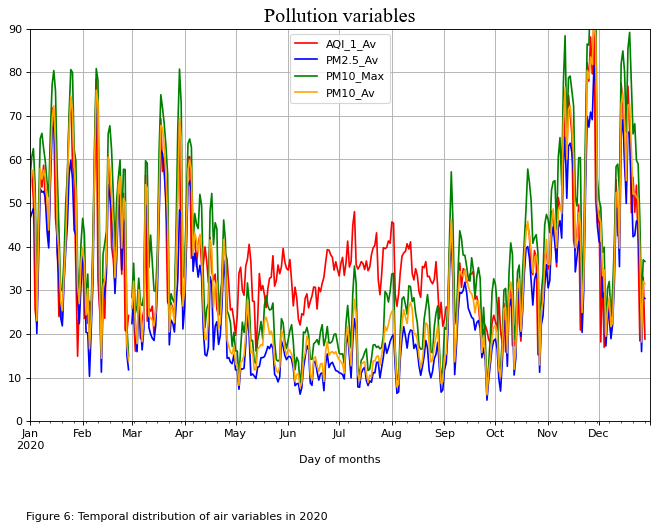

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

df["AQI_1_Av"].plot(c = "red", figsize=(10, 6.5))
df["PM2.5_Av"].plot(c = "blue")
df["PM10_Max"].plot(c = "green")
df["PM10_Av"].plot(c = "orange")
plt.ylim(0, 90)
plt.figtext(0.12, -0.065, "Figure 6: Temporal distribution of air variables in 2020" , 
            fontsize=10)
plt.title("Pollution variables", fontsize = 18, **{'fontname':'Times New Roman'})
plt.xlabel('Day of months')
plt.legend(loc='best')
plt.grid()
plt.show()

Here we can observe the same variables but on their own

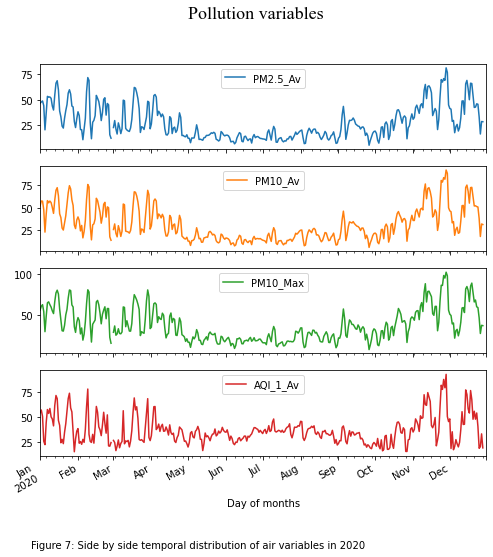

In [50]:
ax = df[["PM2.5_Av","PM10_Av", "PM10_Max", "AQI_1_Av"]].plot(subplots=True, figsize=(8, 8)); plt.legend(loc='best')
plt.xlabel('Day of months')
plt.suptitle("Pollution variables", fontsize = 18, **{'fontname':'Times New Roman'})
plt.figtext(0.11, 0.04, "Figure 7: Side by side temporal distribution of air variables in 2020" , 
            fontsize=10)
plt.legend(loc='best')
plt.show()

Considering only PM levels, which are included in the air quality calculation, we can see that for the May-August period values are low, while during the cold period they are high. We have the same behaviour for the daily new cases. Of course we cannot have a comparison for the first two months since the first case of Covid-19 was recorded in late February.

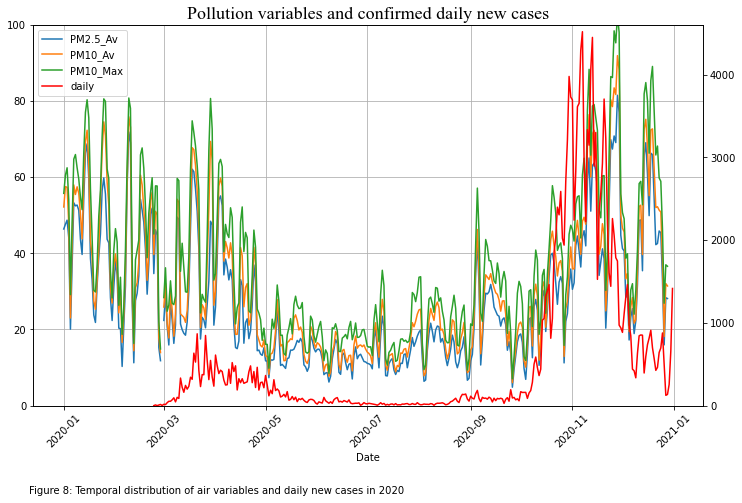

In [51]:
fig = plt.figure() 
ax = fig.add_subplot(111) #size of the plot
lns1 = ax.plot(df["PM2.5_Av"], label = 'PM2.5_Av')
lns2 = ax.plot(df["PM10_Av"], label = 'PM10_Av')
lns3 = ax.plot(df["PM10_Max"], label = 'PM10_Max')
ax2 = ax.twinx() #create another axes
lns4 = ax2.plot(df["daily"], label = 'daily', c = "red")

# added these three lines
lns = lns1+lns2+lns3+lns4 #merge every label in a single legend
labs = [l.get_label() for l in lns] #set legend labels
ax.legend(lns, labs, loc=0) #create legend
ax.grid()
ax.set_xlabel("Date") #x-axis name
ax2.set_ylim(0, 4600) #fix second y-axis length
ax.set_ylim(0,100) #fix first y-axis length
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.title("Pollution variables and confirmed daily new cases", fontsize = 18, **{'fontname':'Times New Roman'})
plt.figtext(0.12, -0.05, "Figure 8: Temporal distribution of air variables and daily new cases in 2020" , 
            fontsize=10)
fig.set_figheight(7)
fig.set_figwidth(12)
               
plt.show()

As we already discussed daily average temperatures and windspeed are the most correlated variables to daily new cases. Also Air Quality Index presents moderate correlations for each subperiod to Covid-19 cases, in Figure 9 we are displaying their behaviour. Looking at the graphic, the variable which replicate the most the behaviour of daily new cases is the Air Quality Index.

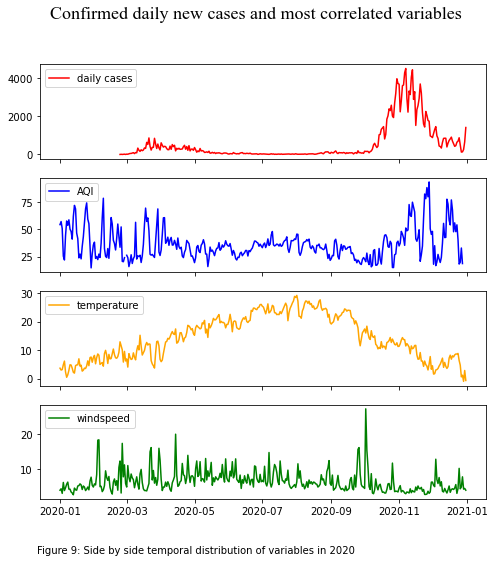

In [52]:
import matplotlib.pyplot as plt

labels = ["daily cases", "AQI", "temperature", "windspeed"]
colors = ["red", "blue", "orange","green"]

fig,axs = plt.subplots(4, sharex=True, sharey=False, figsize=(8, 8))

axs[0].plot(df["daily"], color = colors[0], label = labels[0])
axs[0].legend(loc="upper left")

axs[1].plot(df["AQI_1_Av"], color = colors[1], label = labels[1])
axs[1].legend(loc="upper left")


axs[2].plot(df["TG"], color = colors[2], label = labels[2])
axs[2].legend(loc="upper left")

axs[3].plot(df["windspeed_Av"], color = colors[3], label = labels[3])
axs[3].legend(loc="upper left")


plt.suptitle("Confirmed daily new cases and most correlated variables", fontsize = 18, **{'fontname':'Times New Roman'})
plt.figtext(0.12, 0.03, "Figure 9: Side by side temporal distribution of variables in 2020" , 
            fontsize=10)
plt.setp(axs[2].get_xticklabels(), rotation = 45)
plt.show()

According to our previous comment, we procede to do a comparison between daily new cases and Air Quality Index. Now is more clear that, especially in the colder period, they have a similar behaviour. For this reason we can consider Air Quality Index as a possible explanatory variable in the linear regression model.

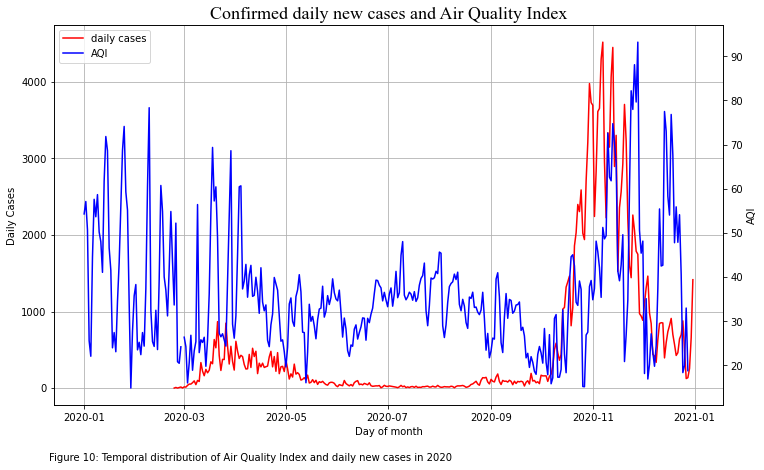

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure() 
ax = fig.add_subplot(111)
fig1 = ax.plot(df["daily"], c = "red")
ax2 = ax.twinx()
fig2 = ax2.plot(df["AQI_1_Av"], c = "blue")
fig3 = fig1 + fig2
labs = ["daily cases", "AQI"]
ax.legend(fig3, labs, loc=2) #create legend
ax2.set_ylabel('AQI')
ax.set_ylabel("Daily Cases")
ax.set_xlabel("Day of month")
plt.title("Confirmed daily new cases and Air Quality Index", fontsize = 18, **{'fontname':'Times New Roman'})
plt.figtext(0.12, 0.015, "Figure 10: Temporal distribution of Air Quality Index and daily new cases in 2020" , 
            fontsize=10)
fig.set_figheight(7)
fig.set_figwidth(12)
ax.grid()


Below we present the variables that we are going to use in the regression model. We choose these variables since they are the most correlated.

In [54]:
cor_day_t = round(df.corr()["daily"]["TG"],2)
cor_day_w = round(df.corr()["daily"]["windspeed_Av"],2)
cor_day_AQI = round(df.corr()["daily"]["AQI_1_Av"],2)

In [55]:
cortdaily = round(df.corr()["TG"]["daily"],2)
corwdaily = round(df.corr()["windspeed_Av"]["daily"],2)
corHdaily = round(df.corr()["HU"]["daily"],2)
Table14 = pd.DataFrame([cortdaily, corwdaily, cor_day_AQI],
                  index=pd.Index(['Air temp. T (°C)', "Wind speed (km/h)", "Air Quality Index"]),
                  columns=pd.MultiIndex.from_product([['Time Period: February 24 - 28 December 2020'],["Daily new cases"]], names = ["", "Most correlated variables"]))
Table14

Time Period: February 24 - 28 December 2020
Most correlated variables                             Daily new cases
Air temp. T (°C)                                                -0.44
Wind speed (km/h)                                               -0.35
Air Quality Index                                                0.36

## Linear Regression Model

As we said earlier we are computing a linear regression model. In this first step we are only using daily average temperature and Air Quality Index because based on correlations and Figure 9 they look like possible explanatory variables. Wind speed does not seems to behave coherently to daily new cases.

In [56]:
df2 = df[["daily", "AQI_1_Av", "TG"]]
na = (pd.isna(df2['daily']) |
pd.isna(df2['AQI_1_Av']))
df2 = df2.loc[~ na]

In order to compute the regression, we use the sklearn library. Firstly we separate the observations in training and test sets through the command train_test_split(). Consequently we obtain various subdataframes that we need to reshape into arrays for the computation of the linear regression.

In [57]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)
dailytrain_set = train_set["daily"]
dailytest_set = test_set["daily"]
Xtrain_set = train_set[["AQI_1_Av", "TG"]]
Xtest_set = test_set[["AQI_1_Av", "TG"]]

dailytrain_set = np.array(dailytrain_set)
dailytrain_set = dailytrain_set.reshape(-1,1)
Xtrain_set = np.array(Xtrain_set)
Xtrain_set = Xtrain_set.reshape(-1,2)

dailytest_set = np.array(dailytest_set)
dailytest_set = dailytest_set.reshape(-1,1)
Xtest_set = np.array(Xtest_set)
Xtest_set = Xtest_set.reshape(-1,2)


The first step is to check whether the variables that we used are significant for the model. As you can see according to the p-values of t-test and F-test (<0.05) both the variables and the whole model are significant. Even then we can observe that the model present a low R-squared. 

In [58]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(Xtrain_set)
est = sm.OLS(dailytrain_set, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     46.93
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           5.83e-18
Time:                        10:02:33   Log-Likelihood:                -2009.0
No. Observations:                 246   AIC:                             4024.
Df Residuals:                     243   BIC:                             4034.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        769.7692    222.392      3.461      0.0

Now we can fit the model and evaluate its result using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) since they have the same measure unit of the observations. Results are not satisfying since both errors are high. For this reason the test set is going to be underfitted.

In [59]:
lin_reg = LinearRegression()
model = lin_reg.fit(Xtrain_set, dailytrain_set)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

cases_predictions = lin_reg.predict(Xtrain_set)
lin_mse = mean_squared_error(dailytrain_set, cases_predictions)
lin_rmse = round(np.sqrt(lin_mse),2)
lin_mae = round(mean_absolute_error(dailytrain_set, cases_predictions),2)
print("RMSE:", lin_rmse, "MAE:",lin_mae)

RMSE: 852.04 MAE: 506.18


As we discussed in the previous section, the model underfits the predicted values, since we have a RMSE of 591 cases and a MAE of 390 cases on the test set. 

In [60]:
test_predictions = lin_reg.predict(Xtest_set)
mse = mean_squared_error(dailytest_set, test_predictions)
rmse = round(np.sqrt(mse),2)
mae = round(mean_absolute_error(dailytest_set, test_predictions),2)
print(rmse,mae)

590.65 389.77


To better check the diagnostic of the errors, we can use the cross validation. Also these technique suggest to us that the model is underfitting. For these reasons what are we going to do is to add another variable, which is wind speed.

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, Xtrain_set, dailytrain_set,
                         scoring="neg_mean_squared_error", cv=10)  #10 times repeated

reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", np.around(scores,2))
    print("Mean:", round(scores.mean(),2))
    print("Standard deviation:", round(scores.std(),2))

display_scores(reg_rmse_scores)

Scores: [852.49 772.64 905.91 848.85 656.11 996.9  787.9  994.4  884.01 807.49]
Mean: 850.67
Standard deviation: 97.96


In [62]:
df2 = df[["daily", "AQI_1_Av", "TG", "windspeed_Av"]]
na = (pd.isna(df2['daily']) |
pd.isna(df2['AQI_1_Av']))
df2 = df2.loc[~ na]

After adjusting the dataframe we can now compute the second linear regression model in the same manner we did before.

In [63]:
train_set, test_set = train_test_split(df2, test_size=0.2, random_state=42)
dailytrain_set = train_set["daily"]
dailytest_set = test_set["daily"]
Xtrain2_set = train_set[["AQI_1_Av", "TG", "windspeed_Av"]]
Xtest2_set = test_set[["AQI_1_Av", "TG", "windspeed_Av"]]

dailytrain_set = np.array(dailytrain_set)
dailytrain_set = dailytrain_set.reshape(-1,1)
Xtrain2_set = np.array(Xtrain2_set)
Xtrain2_set = Xtrain2_set.reshape(-1,3)

dailytest_set = np.array(dailytest_set)
dailytest_set = dailytest_set.reshape(-1,1)
Xtest2_set = np.array(Xtest2_set)
Xtest2_set = Xtest2_set.reshape(-1,3)

Adding the wind speed does not change the fact that both model and variables are significant. We can see that R-squared is higher but to do a comparison we should use the Adjusted R-squared which is weighted with the number of variables used in the model. We observe that the adjusted measure is higher than the first model so it is worthed to add a third variable.

In [64]:
X3 = sm.add_constant(Xtrain2_set)
est = sm.OLS(dailytrain_set, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     39.30
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.00e-20
Time:                        10:02:33   Log-Likelihood:                -2000.3
No. Observations:                 246   AIC:                             4009.
Df Residuals:                     242   BIC:                             4023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.7201    275.475      5.415      0.0

As you can see above the model explain only 33% of the variability of the number of daily cases. Moreover looking at both errors on test and training sets we still have the case of underfitting. For these reasons we comprehend that the considerated variables can be useful to study the situation, but not enough to predict the number of daily cases.

In [65]:
lin_reg2 = LinearRegression()
model2 = lin_reg2.fit(Xtrain2_set, dailytrain_set)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

cases_predictions = lin_reg2.predict(Xtrain2_set)
lin_mse2 = mean_squared_error(dailytrain_set, cases_predictions)
lin_rmse2 = round(np.sqrt(lin_mse2),2)
lin_mae2 = round(mean_absolute_error(dailytrain_set, cases_predictions),2)
print(lin_rmse2,lin_mae2)

822.63 524.98


In [66]:
test_predictions = lin_reg2.predict(Xtest2_set)
mse = mean_squared_error(dailytest_set, test_predictions)
rmse = round(np.sqrt(mse),2)
mae = round(mean_absolute_error(dailytest_set, test_predictions),2)
print(rmse,mae)

610.73 436.94


## Conclusions

During the replication of the result of the article, we analyzed that it was generated in a period of lacking information, for this reason some of the correlations presented, as the one between Total Cases and Daily Average Temperature are considered a spurious correlation. This was an opportunity to extend the research to the whole 2020, comparing the results and to consider other techniques like linear regression. <br>
<br>
In conclusion we can state that the most related variables to daily new cases are Air Quality, Daily Average Wind Speed and Daily Average Temperature. In average when Air Quality is worse there are more Covid-19 Cases, while when we have higher temperatures we have less cases. In the same direction when Wind Speed is faster we also have less cases. Also PM levels have a moderate correlation with Covid-19 Cases, but since AQI contains part of their information it is appropriate to only use the Air Quality Index.<br>
<br>
One of the major conclusion in the article was the positive correlation between Daily Cases and Air Temperature, this supports the hypothesis that warm season wouldn’t stop COVID-19 cases. However, if we consider the whole 2020, we can conclude that when we have higher temperatures, we have less cases. Even if cases were non stopped, the number of daily cases decreased during the warm period, which contradicts the main hypothesis of the article. <br>
<br>
The most related variables with Daily Cases were used to compute a linear regression model. After fitting the model, it explains the 33% of the variability of the variable Daily Cases. Even though we have considered significant variables that we analyzed through our calculations, the predicted values were underfitting in both, training and test sets. This means that these variables can support a linear model based on more variables, but they cannot predict on their own.